In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch


from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.blocc import blocc
from algorithms.single import single
from algorithms.gaffa import gaffa

from utils import *
import warnings

warnings.filterwarnings("ignore")

In [2]:

def set_seed(seed):
    #random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic=True

In [3]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'blocc': {
        'gam': 12.,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    },
    'single': {
        'delta': 0.01,
        'eta_x': 0.001,
        'eta_y': 0.001,
        'eta_z': 0.001,
        'eta_u': 0.001,
        'eta_v': 0.001,
        'rho_1': 0.01,
        'rho_2': 0.01,
    },
    'gaffa': {
        'p': 0.3,
        'gam1': 10,
        'gam2': 0.01,
        'eta': 0.01,
        'alpha': 0.001,
        'beta': 0.001,
        'ck0': 10,
        'R': 10,
    }
}

# Dataset Diabetes

In [19]:
dataset_name = "diabetes"
data = load_diabetes()

n_train = 500
n_val = 150


In [20]:
seeds=10

In [21]:

metrics_diabetes = {}
variables_diabetes = {}

algs = ['blocc', 'lv_hba', 'gam', 'single', 'gaffa']

for a in algs:
    metrics_diabetes[a] = []
    variables_diabetes[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")


    set_seed(seed)

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in ['blocc', 'lv_hba', 'gam', 'single', 'gaffa']:
        print(f"{alg}", end=" ")
        if alg=='single': 
            epochs=10000
        elif alg=='gaffa': 
            epochs=5000
        elif alg=='gam':
            epochs=60
        elif alg=='blocc':
            epochs=50
        else:
            epochs=80


        set_seed(seed)

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_diabetes[alg].append(metrics_seed)
        variables_diabetes[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: blocc lv_hba gam single gaffa DONE
Starting seed 2/10: blocc lv_hba gam single gaffa DONE
Starting seed 3/10: blocc lv_hba gam single gaffa DONE
Starting seed 4/10: blocc lv_hba gam single gaffa DONE
Starting seed 5/10: blocc lv_hba gam single gaffa DONE
Starting seed 6/10: blocc lv_hba gam single gaffa DONE
Starting seed 7/10: blocc lv_hba gam single gaffa DONE
Starting seed 8/10: blocc lv_hba gam single gaffa DONE
Starting seed 9/10: blocc lv_hba gam single gaffa DONE
Starting seed 10/10: blocc lv_hba gam single gaffa DONE


## SAVE

In [22]:
results_path = f'Plots_{dataset_name}/'

In [23]:


metrics_lvhba = metrics_diabetes['lv_hba']
metrics_gam = metrics_diabetes['gam']
metrics_blocc = metrics_diabetes['blocc']
metrics_single = metrics_diabetes['single']
metrics_gaffa = metrics_diabetes['gaffa']


axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
axis_blocc = np.array([[x['time_computation'] for x in metric] for metric in metrics_blocc]).mean(0)
axis_single = np.array([[x['time_computation'] for x in metric] for metric in metrics_single]).mean(0)
axis_gaffa = np.array([[x['time_computation'] for x in metric] for metric in metrics_gaffa]).mean(0)


train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
train_acc_gam = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
train_acc_blocc = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blocc])
train_acc_single = np.array([[x['train_acc_z'] for x in metric] for metric in metrics_single])
train_acc_gaffa = np.array([[x['train_acc'] for x in metric] for metric in metrics_gaffa])


test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])
test_acc_gam = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
test_acc_blocc = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_blocc])
test_acc_single = np.array([[x['test_acc_z'] for x in metric] for metric in metrics_single])
test_acc_gaffa = np.array([[x['test_acc'] for x in metric] for metric in metrics_gaffa])


np.save("axis_lvhba_diabetes.npy", axis_lvhba)
np.save("axis_gam_diabetes.npy", axis_gam)
np.save("axis_blocc_diabetes.npy", axis_blocc)
np.save("train_acc_lvhba_diabetes.npy", train_acc_lvhba)
np.save("train_acc_gam_diabetes.npy", train_acc_gam)
np.save("train_acc_blocc_diabetes.npy", train_acc_blocc)
np.save("axis_single_diabetes.npy", axis_single)
np.save("axis_gaffa_diabetes.npy", axis_gaffa)
np.save("train_acc_single_diabetes.npy", train_acc_single)
np.save("train_acc_gaffa_diabetes.npy", train_acc_gaffa)

np.save("test_acc_lvhba_diabetes.npy", test_acc_lvhba)
np.save("test_acc_gam_diabetes.npy", test_acc_gam)
np.save("test_acc_blocc_diabetes.npy", test_acc_blocc)
np.save("test_acc_single_diabetes.npy", test_acc_single)
np.save("test_acc_gaffa_diabetes.npy", test_acc_gaffa)


## LOAD

In [24]:
axis_lvhba = np.load("axis_lvhba_diabetes.npy")
axis_gam = np.load("axis_gam_diabetes.npy")
axis_blocc = np.load("axis_blocc_diabetes.npy")

train_acc_lvhba = np.load("train_acc_lvhba_diabetes.npy")
train_acc_gam = np.load("train_acc_gam_diabetes.npy")
train_acc_blocc = np.load("train_acc_blocc_diabetes.npy")

axis_single = np.load("axis_single_diabetes.npy")
axis_gaffa = np.load("axis_gaffa_diabetes.npy")

train_acc_single = np.load("train_acc_single_diabetes.npy")
train_acc_gaffa = np.load("train_acc_gaffa_diabetes.npy")

test_acc_lvhba = np.load("test_acc_lvhba_diabetes.npy")
test_acc_gam = np.load("test_acc_gam_diabetes.npy")
test_acc_blocc = np.load("test_acc_blocc_diabetes.npy")

test_acc_single = np.load("test_acc_single_diabetes.npy")
test_acc_gaffa = np.load("test_acc_gaffa_diabetes.npy")



## PLOT

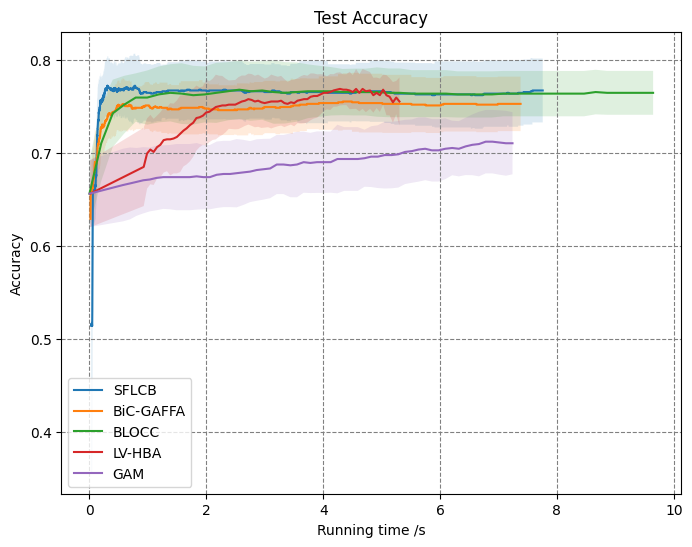

In [25]:
plt.figure(figsize=(8,6))

plt.plot(axis_single,test_acc_single.mean(0),'-',label="SFLCB")
plt.fill_between(axis_single,test_acc_single.mean(0)-test_acc_single.std(0),test_acc_single.mean(0)+test_acc_single.std(0),alpha=0.15)

plt.plot(axis_gaffa,test_acc_gaffa.mean(0),'-',label="BiC-GAFFA")
plt.fill_between(axis_gaffa,test_acc_gaffa.mean(0)-test_acc_gaffa.std(0),test_acc_gaffa.mean(0)+test_acc_gaffa.std(0),alpha=0.15)


plt.plot(axis_blocc,test_acc_blocc.mean(0),'-',label="BLOCC")
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.15)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.15)

plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.15)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.grid(linestyle='dashed', color="grey")

plt.savefig('test_accuracy_running_time.png', bbox_inches="tight")

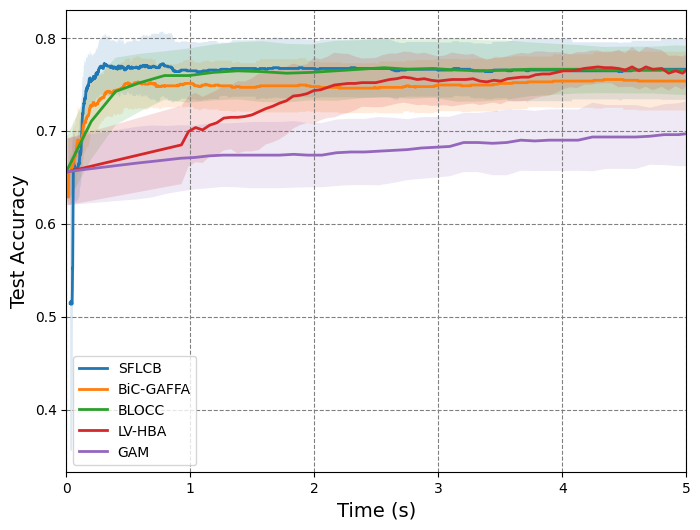

In [28]:
plt.figure(figsize=(8,6))

plt.plot(axis_single,test_acc_single.mean(0),'-',label="SFLCB", linewidth=2)
plt.fill_between(axis_single,test_acc_single.mean(0)-test_acc_single.std(0),test_acc_single.mean(0)+test_acc_single.std(0),alpha=0.15)

plt.plot(axis_gaffa,test_acc_gaffa.mean(0),'-',label="BiC-GAFFA", linewidth=2)
plt.fill_between(axis_gaffa,test_acc_gaffa.mean(0)-test_acc_gaffa.std(0),test_acc_gaffa.mean(0)+test_acc_gaffa.std(0),alpha=0.15)


plt.plot(axis_blocc,test_acc_blocc.mean(0),'-',label="BLOCC", linewidth=2)
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.15)



plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA", linewidth=2)
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.15)

plt.plot(axis_gam,test_acc_gam.mean(0),'-',label="GAM", linewidth=2)
plt.fill_between(axis_gam,test_acc_gam.mean(0)-test_acc_gam.std(0),test_acc_gam.mean(0)+test_acc_gam.std(0),alpha=0.15)

plt.legend()
# plt.title('Test Accuracy')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel("Test Accuracy", fontsize=14)
plt.grid(linestyle='dashed', color="grey")

plt.xlim([0,5])
plt.savefig('test_accuracy.png', bbox_inches="tight")